In [115]:
# Pull the data into this Python session:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
GamesDF = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
GamesDF.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
# First, I create a variable which contains the data frame where all rows with ANY (even one) missing value is dropped
GamesDF_Dropped_All = GamesDF.dropna()
GamesDF_Dropped_All.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


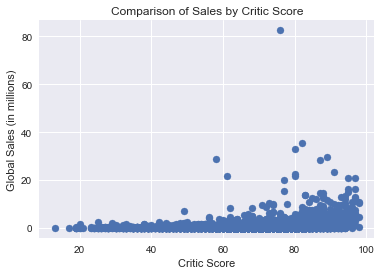

In [85]:
# Next, I will create a scatterplot to get a feel for how the data looks
plt.scatter(GamesDF_Dropped_All.Critic_Score, GamesDF_Dropped_All.Global_Sales)
plt.xlabel("Critic Score")
plt.ylabel("Global Sales (in millions)")
plt.title("Comparison of Sales by Critic Score")
plt.show()
# There appears to be a loose positive linear trend with this data

In [86]:
# Another thing to keep in mind is the release date
# A game release in 2006 has had 11 years to accumulate wealth, while a game release in 2015 had only 2 year to accumulate wealth
# For this reason, we will have a more accurate assesment if we compare the games that were released in the same year
# Let's start with 2006, since this year seems to be very intersting, due to the fact that many of the high selling games-
# (including Wii Sports, the game with the #1 highest sales) were released in 2006

GamesDF2006_Dropped_All = GamesDF_Dropped_All[GamesDF_Dropped_All.Year_of_Release == 2006]
GamesDF2006_Dropped_All.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
107,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.74,2.14,0.60,0.68,7.15,95.0,73.0,9,1658.0,Nintendo,T
142,Gears of War,X360,2006.0,Shooter,Microsoft Game Studios,3.54,1.88,0.07,0.60,6.09,94.0,88.0,8.3,2295.0,Epic Games,M


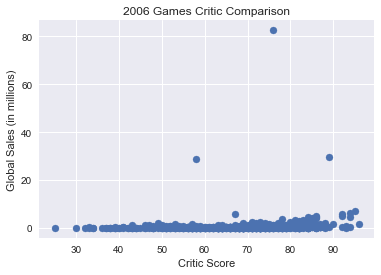

In [87]:
# Now, let's see what the plot looks like

plt.scatter(GamesDF2006_Dropped_All.Critic_Score, GamesDF2006_Dropped_All.Global_Sales)
plt.xlabel("Critic Score")
plt.ylabel("Global Sales (in millions)")
plt.title("2006 Games Critic Comparison")
plt.show()

# There appears to be a slight positive linear trend
# However, the three outliers are very interesting
# These three games are "Wii Sports", "New Super Mario Bros.", and "Wii Play"
# Two of these games - "Wii Sports" and "Wii Play" - came bundled with the something else
# "Wii Sports" came included with the Wii Console and "Wii Play" came included with the purchase of an extra Wii Remote
# With this in mind, the sale of these games are directly parellel with the sale of wii consoles and - in some cases --
# extra Wii Remotes
# This is important for game developers/investors to be aware of, which is that game sales will drastically - 
# increase if they come bundled with a gaming console

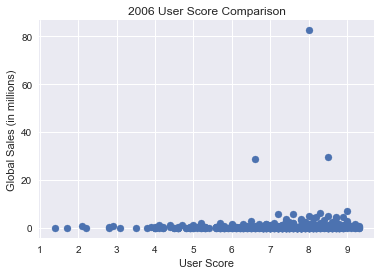

In [88]:
# As for "New Super Mario Bros", I didn't find any evidence of it regularly coming bundled with any console or accessory
# And according to (http://www.vgchartz.com/game/1582/new-super-mario-bros/), the global sales were 29.81 million, showing 
# that this is not an error in the data I have.

# Let's see how the "User Score" compares:

plt.scatter(GamesDF2006_Dropped_All.User_Score, GamesDF2006_Dropped_All.Global_Sales)
plt.xlabel("User Score")
plt.ylabel("Global Sales (in millions)")
plt.title("2006 User Score Comparison")
plt.show()

# It appears that User Score provides a more positive linear correlation, and would be a more reliable predictor of game sales.
# This would appear to make sense, because it is the USERS, not the CRITICS who are purchasing the most games

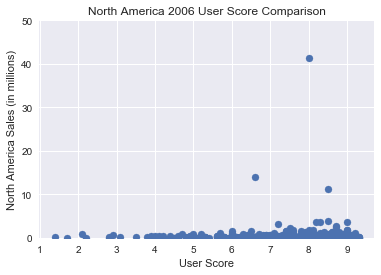

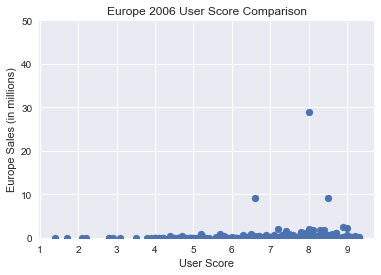

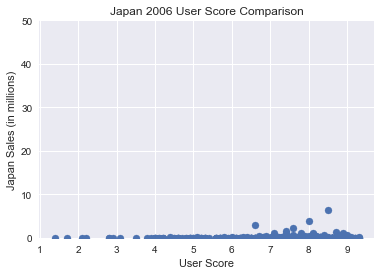

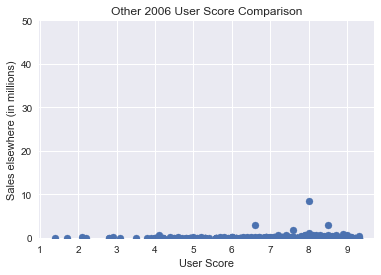

In [89]:
# Based on my brief look at the dataframe itself, it appears that most of the sales are in North America, but I will -
# plot it just to give a more definitive visual confirmation

plt.scatter(GamesDF2006_Dropped_All.User_Score, GamesDF2006_Dropped_All.NA_Sales)
plt.xlabel("User Score")
plt.ylabel("North America Sales (in millions)")
plt.ylim(0, 50)
plt.title("North America 2006 User Score Comparison")
plt.show()

plt.scatter(GamesDF2006_Dropped_All.User_Score, GamesDF2006_Dropped_All.EU_Sales)
plt.xlabel("User Score")
plt.ylabel("Europe Sales (in millions)")
plt.ylim(0, 50)
plt.title("Europe 2006 User Score Comparison")
plt.show()

plt.scatter(GamesDF2006_Dropped_All.User_Score, GamesDF2006_Dropped_All.JP_Sales)
plt.xlabel("User Score")
plt.ylabel("Japan Sales (in millions)")
plt.ylim(0, 50)
plt.title("Japan 2006 User Score Comparison")
plt.show()

plt.scatter(GamesDF2006_Dropped_All.User_Score, GamesDF2006_Dropped_All.Other_Sales)
plt.xlabel("User Score")
plt.ylabel("Sales elsewhere (in millions)")
plt.ylim(0, 50)
plt.title("Other 2006 User Score Comparison")
plt.show()

In [90]:
# As you can see by the above graphs, it appears North America takes the lead with the most sales total
# Let's add them just to be on the safe side:

Total_NA = GamesDF2006_Dropped_All['NA_Sales'].sum()
Total_EU = GamesDF2006_Dropped_All['EU_Sales'].sum()
Total_JP = GamesDF2006_Dropped_All['JP_Sales'].sum()
Total_O = GamesDF2006_Dropped_All['Other_Sales'].sum()
print("Total North American Sales:", Total_NA)
print("Total Europe Sales:", Total_EU)
print("Total Japan Sales:", Total_JP)
print("Total Other Sales:", Total_O)


Total North American Sales: 225.69000000000014
Total Europe Sales: 104.53000000000036
Total Japan Sales: 40.43000000000003
Total Other Sales: 45.89999999999992


In [91]:
# Just as the graphs suggested: North America has by far the highest total sales
# But let's also have a look at the average sales

Avg_NA = GamesDF2006_Dropped_All['NA_Sales'].mean()
Avg_EU = GamesDF2006_Dropped_All['EU_Sales'].mean()
Avg_JP = GamesDF2006_Dropped_All['JP_Sales'].mean()
Avg_O = GamesDF2006_Dropped_All['Other_Sales'].mean()
print("Average North American Sales:", Avg_NA)
print("Average Europe Sales:", Avg_EU)
print("Average Japan Sales:", Avg_JP)
print("Average Other Sales:", Avg_O)

Average North American Sales: 0.4274431818181821
Average Europe Sales: 0.19797348484848554
Average Japan Sales: 0.07657196969696975
Average Other Sales: 0.08693181818181803


In [92]:
# So North America by far takes the lead in both the total and average video game sale
# This is important for game developers/investors on a tight budget to know that if they can only pick one place to -
# release a game, it should be in North America

# Now, let's see if we get a trend showing with the gaming platform:
# First, let's take a look at how many games were released for each console:
GamesDF2006_Dropped_All['Platform'].value_counts()

PS2     117
PSP     100
X360     76
DS       71
XB       39
PC       38
Wii      33
GC       24
PS3      19
GBA      11
Name: Platform, dtype: int64

In [93]:
# There are a wide variety of the number of games made for each console in this year
# It may be a better idea to start analyzing trends on a more recent year, since this will provide more relevant and -
# useful information for game developers/investors

GamesDF_Dropped_All.sort_values('Year_of_Release').tail()



,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5990,UEFA Euro 2016,PS4,2016.0,Sports,Konami Digital Entertainment,0.00,0.22,0.04,0.04,0.29,72.0,7.0,6.6,8.0,Konami,E
15582,Mighty No. 9,XOne,2016.0,Platform,Deep Silver,0.02,0.00,0.00,0.00,0.02,55.0,13.0,4.2,94.0,Inti Creates,E10+
8900,LEGO Harry Potter Collection,PS4,2016.0,Action,Warner Bros. Interactive Entertainment,0.01,0.11,0.00,0.02,0.15,73.0,16.0,8.1,7.0,Warner Bros. Interactive Entertainment,E10+
5008,Deus Ex: Mankind Divided,PS4,2016.0,Role-Playing,Square Enix,0.11,0.21,0.00,0.06,0.38,84.0,59.0,7.6,511.0,Eidos Montreal,M
8464,Far Cry: Primal,PC,2016.0,Action,Ubisoft,0.04,0.11,0.00,0.01,0.16,74.0,18.0,4.8,368.0,Ubisoft Montreal,M


In [122]:
# Let's look at year 2016 now, since that is the most recent data available, and seems to be a good predictor of more-
# current trends
print("-------------------------------------------------------------------------------------------------------------")
print("")
print("2016 Stats")
GamesDF2016_Dropped_All = GamesDF_Dropped_All[GamesDF_Dropped_All.Year_of_Release == 2016]
GamesDF2016_Dropped_All.head()

-------------------------------------------------------------------------------------------------------------

2016 Stats


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
94,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.66,5.75,0.08,1.11,7.59,85.0,41.0,5,398.0,"EA Sports, EA Vancouver",E
171,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,Sony Computer Entertainment,1.85,2.50,0.19,0.85,5.38,93.0,113.0,7.9,7064.0,Naughty Dog,T
245,Call of Duty: Infinite Warfare,PS4,2016.0,Shooter,Activision,1.61,2.00,0.15,0.71,4.46,77.0,82.0,3.4,1129.0,Infinity Ward,M
289,Battlefield 1,PS4,2016.0,Shooter,Electronic Arts,1.10,2.15,0.21,0.61,4.08,88.0,31.0,8.4,809.0,EA DICE,M
325,Tom Clancy's The Division,PS4,2016.0,Shooter,Ubisoft,1.35,1.70,0.15,0.60,3.80,80.0,64.0,7,2219.0,Massive Entertainment,M


In [95]:
# Now that I take a look at this chart, I notice a difference in trends from 2006: which is the number of North American sales
# The top selling game in 2016 was FIFA 17, with Europe by far taking the lead in sales.
# This is almost certainly due to the fact that soccer is incredibly popular in Europe, so it would make sense that -
# this game would sell so well in Europe.
# Another thing to keep in mind for game devlopers/investors is that soccer games (FIFA in particular) will sell -
# very well in Europe

# Another thing I'm noticing just by looking at the dataframe is that the PS4 seems to be a more popular console than -
# the XOne (Xbox One), as well as 'shooter' genre games appearing to be listed most frequently in the top sellers
# I'm also noticing the Europe sales are higher than North American sales in many cases for 2016.  

# With all of this in mind, I'm going to compare the regional sales first similar to the analysis in 2006.
# Then, I will compare the global sales with regard to Platform and Genre

Total_NA = GamesDF2016_Dropped_All['NA_Sales'].sum()
Total_EU = GamesDF2016_Dropped_All['EU_Sales'].sum()
Total_JP = GamesDF2016_Dropped_All['JP_Sales'].sum()
Total_O = GamesDF2016_Dropped_All['Other_Sales'].sum()
print("Total North American Sales:", Total_NA)
print("Total Europe Sales:", Total_EU)
print("Total Japan Sales:", Total_JP)
print("Total Other Sales:", Total_O)

print("------------------------------------")

Avg_NA = GamesDF2016_Dropped_All['NA_Sales'].mean()
Avg_EU = GamesDF2016_Dropped_All['EU_Sales'].mean()
Avg_JP = GamesDF2016_Dropped_All['JP_Sales'].mean()
Avg_O = GamesDF2016_Dropped_All['Other_Sales'].mean()
print("Average North American Sales:", Avg_NA)
print("Average Europe Sales:", Avg_EU)
print("Average Japan Sales:", Avg_JP)
print("Average Other Sales:", Avg_O)

Total North American Sales: 34.519999999999996
Total Europe Sales: 41.02999999999996
Total Japan Sales: 4.339999999999995
Total Other Sales: 11.589999999999971
------------------------------------
Average North American Sales: 0.16283018867924526
Average Europe Sales: 0.1935377358490564
Average Japan Sales: 0.020471698113207527
Average Other Sales: 0.05466981132075458


In [96]:
# As expected based on my quick look at the dataframe, Europe sales were higher than North American sales
# However, the average sales weren't that drastically different b/w North America and Europe (.3 million dollar difference)
# Still, my advice for game developer/investors is now different when I analyzed trends in 2006; Europe sells more games -
# now, so if you had to pick just one area to sell, it should be in Europe

# Next, I'm going to analyze global sales based on platform

GamesDF2016_Dropped_All['Platform'].value_counts()
# Shows all the consoles that games were made on this year


PS4     92
XOne    55
PC      37
3DS     10
PSV     10
WiiU     8
Name: Platform, dtype: int64

In [125]:
Platform2016_Sales = GamesDF2016_Dropped_All[['Platform', 'Global_Sales']]

#Ignore->
PS42016 = Platform2016_Sales[Platform2016_Sales.Platform == 'PS4']
XOne2016 = Platform2016_Sales[Platform2016_Sales.Platform == 'XOne']
PC2016 = Platform2016_Sales[Platform2016_Sales.Platform == 'PC']
TDS2016 = Platform2016_Sales[Platform2016_Sales.Platform == '3DS']
PSV2016 = Platform2016_Sales[Platform2016_Sales.Platform == 'PSV']
WiiU2016 = Platform2016_Sales[Platform2016_Sales.Platform == 'WiiU']

Platform2016Data = (PS42016, XOne2016, PC2016, TDS2016, PSV2016, WiiU2016)
Groups = ("PS4", "XboxOne", "PC", "3DS", "PSV", "WiiU") # <- Ignore

print("-------------------------------------------------------------------------------------------")
print("")
print("2016 Total Sales by Platform")
Platform2016_Sales.groupby("Platform").sum().sort_values("Global_Sales")
# Looks like games on PS4 sell the most by far, followed by Xbox One

-------------------------------------------------------------------------------------------

2016 Total Sales by Platform


,Global_Sales
Platform,
PSV,0.95
3DS,2.18
WiiU,3.25
PC,4.69
XOne,23.36
PS4,57.13


In [98]:
Platform2016_Sales.groupby("Platform").mean().sort_values("Global_Sales")
# However, the averages seem to even out a little bit, with Xbox One and WiiU being fairly close, and PS4 taking a .2 million dollar lead

,Global_Sales
Platform,
PSV,0.095000
PC,0.126757
3DS,0.218000
WiiU,0.406250
XOne,0.424727
PS4,0.620978


In [99]:
# Either way, PS4 takes the lead, and if a game developer/investor had to pick only one console to release a game on,
# it should be the PS4.

Genre2016_Sales = GamesDF2016_Dropped_All[["Genre", "Global_Sales"]]
Genre2016_Sales.head()
# Here, I'm evaluating based on Genre

,Genre,Global_Sales
94,Sports,7.59
171,Shooter,5.38
245,Shooter,4.46
289,Shooter,4.08
325,Shooter,3.80


In [100]:
Genre2016_Sales.groupby("Genre").sum().sort_values("Global_Sales")
# Shooter games take the lead in total sales, followed by Sports and Action games

,Global_Sales
Genre,
Misc,0.76
Strategy,0.80
Platform,1.20
Simulation,1.28
Adventure,1.47
Racing,2.05
Fighting,4.15
Role-Playing,4.72
Action,19.34


In [101]:
Genre2016_Sales.groupby("Genre").mean().sort_values("Global_Sales")
# Shooter games sales on average takes the lead by approximatel 0.1 million dollars, followed by Sports games
# Fighting games actually has a 0.2 million dollar higher average in game sales than Action games, even though
# Action games sold a lot more in total

,Global_Sales
Genre,
Adventure,0.098000
Platform,0.120000
Racing,0.136667
Misc,0.152000
Strategy,0.160000
Simulation,0.213333
Role-Playing,0.236000
Action,0.288657
Fighting,0.415000


In conclusion, shooter games sell the most both on average and in sum, so game developers/investors should keep this in mind, and should probably invest their time and resources in shooter games if they could pick only one genre.

Next, I will analyze the same variables as before, only in the years 2015 and 2014:

In [102]:
GamesDF2015_Dropped_All = GamesDF_Dropped_All[GamesDF_Dropped_All.Year_of_Release == 2015]
print("Year 2015: ")
GamesDF2015_Dropped_All.head()



Year 2015: 


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
77,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.0,42.0,4.3,896.0,EA Sports,E
105,Fallout 4,PS4,2015.0,Role-Playing,Bethesda Softworks,2.53,3.27,0.24,1.13,7.16,87.0,58.0,6.5,4228.0,Bethesda Game Studios,M
231,Uncharted: The Nathan Drake Collection,PS4,2015.0,Action,Sony Computer Entertainment,2.07,1.71,0.08,0.76,4.62,86.0,78.0,8.1,1264.0,Bluepoint Games,T
242,Halo 5: Guardians,XOne,2015.0,Shooter,Microsoft Game Studios,2.78,1.27,0.03,0.41,4.48,84.0,101.0,6.4,2438.0,343 Industries,T
247,Splatoon,WiiU,2015.0,Shooter,Nintendo,1.54,1.18,1.46,0.26,4.43,81.0,88.0,8.5,1184.0,Nintendo,E10+


In [103]:
GamesDF2014_Dropped_All = GamesDF_Dropped_All[GamesDF_Dropped_All.Year_of_Release == 2014]
print("Year 2014: ")
GamesDF2014_Dropped_All.head()

Year 2014: 


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,2.81,3.48,0.14,1.23,7.66,83.0,39.0,5.7,1443.0,Sledgehammer Games,M
110,Mario Kart 8,WiiU,2014.0,Racing,Nintendo,3.15,2.15,1.28,0.51,7.09,88.0,82.0,9.1,1599.0,Nintendo,E
143,FIFA 15,PS4,2014.0,Sports,Electronic Arts,0.80,4.33,0.05,0.90,6.08,82.0,47.0,5.7,988.0,EA Sports,E
154,Destiny,PS4,2014.0,Shooter,Activision,2.49,2.07,0.16,0.92,5.64,76.0,95.0,6.1,5380.0,"Bungie Software, Bungie",T


FIFA takes the lead in 2015 sales, and is in the top 5 for 2014 sales, and in both cases Europe makes up the majority of sales.  There doesn't seem to be as many shooter games in the top 5 for these two years as there were in 2016.  Another odd thing I've noticed is that user score seems to have almost no effect on how popular the game is.  The past 3 years, FIFA has scored around a 4-5, yet it was the number one selling game for the past 2 years!  This is obviously very counter-intuitive, but let's explore the data some more:

In [104]:
print("Year 2015 Stats: ")
print("")
Total_NA = GamesDF2015_Dropped_All['NA_Sales'].sum()
Total_EU = GamesDF2015_Dropped_All['EU_Sales'].sum()
Total_JP = GamesDF2015_Dropped_All['JP_Sales'].sum()
Total_O = GamesDF2015_Dropped_All['Other_Sales'].sum()
print("Total North American Sales:", Total_NA)
print("Total Europe Sales:", Total_EU)
print("Total Japan Sales:", Total_JP)
print("Total Other Sales:", Total_O)

print("------------------------------------")

Avg_NA = GamesDF2015_Dropped_All['NA_Sales'].mean()
Avg_EU = GamesDF2015_Dropped_All['EU_Sales'].mean()
Avg_JP = GamesDF2015_Dropped_All['JP_Sales'].mean()
Avg_O = GamesDF2015_Dropped_All['Other_Sales'].mean()
print("Average North American Sales:", Avg_NA)
print("Average Europe Sales:", Avg_EU)
print("Average Japan Sales:", Avg_JP)
print("Average Other Sales:", Avg_O)

print("------------------------------------")
print("------------------------------------")

Year 2015 Stats: 

Total North American Sales: 67.85000000000007
Total Europe Sales: 60.510000000000005
Total Japan Sales: 11.849999999999993
Total Other Sales: 18.86000000000005
------------------------------------
Average North American Sales: 0.3215639810426543
Average Europe Sales: 0.28677725118483416
Average Japan Sales: 0.056161137440758256
Average Other Sales: 0.0893838862559244
------------------------------------
------------------------------------


North America takes the lead in both total and average sales, but followed closely behind by Europe.

Let's have a look at 2014 now:

In [105]:
print("Year 2014 Stats: ")
print("")
Total_NA = GamesDF2014_Dropped_All['NA_Sales'].sum()
Total_EU = GamesDF2014_Dropped_All['EU_Sales'].sum()
Total_JP = GamesDF2014_Dropped_All['JP_Sales'].sum()
Total_O = GamesDF2014_Dropped_All['Other_Sales'].sum()
print("Total North American Sales:", Total_NA)
print("Total Europe Sales:", Total_EU)
print("Total Japan Sales:", Total_JP)
print("Total Other Sales:", Total_O)

print("------------------------------------")

Avg_NA = GamesDF2014_Dropped_All['NA_Sales'].mean()
Avg_EU = GamesDF2014_Dropped_All['EU_Sales'].mean()
Avg_JP = GamesDF2014_Dropped_All['JP_Sales'].mean()
Avg_O = GamesDF2014_Dropped_All['Other_Sales'].mean()
print("Average North American Sales:", Avg_NA)
print("Average Europe Sales:", Avg_EU)
print("Average Japan Sales:", Avg_JP)
print("Average Other Sales:", Avg_O)

print("------------------------------------")
print("------------------------------------")

Year 2014 Stats: 

Total North American Sales: 79.37999999999998
Total Europe Sales: 76.42000000000002
Total Japan Sales: 14.01999999999999
Total Other Sales: 22.58000000000007
------------------------------------
Average North American Sales: 0.31375494071146237
Average Europe Sales: 0.3020553359683795
Average Japan Sales: 0.05541501976284581
Average Other Sales: 0.08924901185770778
------------------------------------
------------------------------------


Similar trend as in 2015: North America takes the lead in both total and average sales, but in 2014 they are closer.  For this year, North America was only approximately 0.01 higher in average sales compared to Europe.

In [106]:
print("2015 Total Global Sales by Platform:")
Platform2015_Sales = GamesDF2015_Dropped_All[['Platform', 'Global_Sales']]
Platform2015_Sales.groupby('Platform').sum().sort_values('Global_Sales')

2015 Total Global Sales by Platform:


,Global_Sales
Platform,
PS3,0.02
PSV,1.72
PC,7.16
3DS,10.58
WiiU,15.33
XOne,44.24
PS4,80.11


Here in 2015, we se another similar trend from 2016 in that PS4 takes the lead in total global sales.

Let's have a look at the averages:

In [107]:
print("2015 Average Global Sales by Platform:")
Platform2015_Sales.groupby('Platform').mean().sort_values('Global_Sales')

2015 Average Global Sales by Platform:


,Global_Sales
Platform,
PS3,0.020000
PSV,0.132308
PC,0.230968
3DS,0.556842
WiiU,0.806842
XOne,0.941277
PS4,0.989012


Here in 2015, we find that the PS4 takes the lead in average sales, but it is followed closely behind by XboxOne, and even WiiU.  Much more closely than the total sales.

Let's have a look at the 2015 Genre stats now:

In [108]:
Genre2015_Sales = GamesDF2015_Dropped_All[["Genre", "Global_Sales"]]
print("2015 Total Sales by Genre:")
Genre2015_Sales.groupby("Genre").sum().sort_values("Global_Sales")

2015 Total Sales by Genre:


,Global_Sales
Genre,
Puzzle,0.10
Strategy,1.35
Adventure,3.47
Simulation,4.23
Racing,4.59
Platform,5.65
Fighting,6.32
Misc,7.13
Role-Playing,25.37


Here, we find a different trend than in 2016, which is that action games take the lead in total sales.

Let's have a look at the averages:

In [109]:
print("2015 Average Sales by Genre:")
Genre2015_Sales.groupby("Genre").mean().sort_values("Global_Sales")

2015 Average Sales by Genre:


,Global_Sales
Genre,
Puzzle,0.033333
Strategy,0.225000
Adventure,0.385556
Racing,0.459000
Misc,0.509286
Action,0.585676
Fighting,0.632000
Simulation,0.705000
Platform,0.706250


Here, we find that shooter games take the lead by far in average sales, while Action games only sell about 1/3 of that on average.  Interesting discrepancy between the total and average sales.

Now, let's have a look at 2014 stats:

In [110]:
print("2014 Total Global Sales by Platform:")
Platform2014_Sales = GamesDF2014_Dropped_All[['Platform', 'Global_Sales']]
Platform2014_Sales.groupby('Platform').sum().sort_values('Global_Sales')

2014 Total Global Sales by Platform:


,Global_Sales
Platform,
PSV,5.30
X360,10.12
PC,11.22
PS3,11.26
3DS,11.52
WiiU,15.21
XOne,47.07
PS4,80.73


Once again, PS4 takes the lead in total sales.

Let's have a look at the average sales:

In [111]:
print("2014 Average Sales by Platform:")
Platform2014_Sales = GamesDF2014_Dropped_All[['Platform', 'Global_Sales']]
Platform2014_Sales.groupby('Platform').mean().sort_values('Global_Sales')

2014 Average Sales by Platform:


,Global_Sales
Platform,
PSV,0.176667
PC,0.320571
PS3,0.321714
X360,0.389231
3DS,0.640000
WiiU,1.014000
XOne,1.094651
PS4,1.582941


PS4 takes the lead again on average, but the XboxOne follows behind by about 2/3 the average sales, however, the WiiU follows closely behind the Xbox One by only 0.08 million dollars

Let's have a look at the stats by Genre now:

In [112]:
Genre2014_Sales = GamesDF2014_Dropped_All[["Genre", "Global_Sales"]]
print("2014 Total Sales by Genre:")
Genre2014_Sales.groupby("Genre").sum().sort_values("Global_Sales")

2014 Total Sales by Genre:


,Global_Sales
Genre,
Strategy,0.40
Adventure,0.69
Puzzle,1.19
Fighting,1.95
Simulation,3.65
Misc,3.94
Platform,8.14
Racing,15.35
Role-Playing,18.53


Similar to 2015, the Action games take the lead in total sales for the year 2014.

Now, let's have a look at the averages:

In [113]:
Genre2014_Sales = GamesDF2014_Dropped_All[["Genre", "Global_Sales"]]
print("2014 Average Sales by Genre:")
Genre2014_Sales.groupby("Genre").mean().sort_values("Global_Sales")

2014 Average Sales by Genre:


,Global_Sales
Genre,
Adventure,0.115000
Fighting,0.177273
Strategy,0.200000
Misc,0.328333
Role-Playing,0.394255
Racing,0.767500
Action,0.788625
Sports,0.882903
Simulation,0.912500


Similar to 2015, the Shooter genre takes the lead in average global sales, while Action genre lags behind by approximatley half.  We see the discrepancy between the total and average sales yet again.

Either way, the popularity of shooter games is definitley on the rise, and I would highly advise game developers/investors to invest their time and resources on shooter games if they are interested in monetary gain.  

Next, I will create a machine learning linear regression model to predict how well a game will do based on genre

In [167]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

y = Genre2016_Sales['Genre'].values
X = Genre2016_Sales.drop('Genre', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

print("Current Model Accuracy:")
print(knn.score(X_test, y_test))

Current Model Accuracy:
0.302325581395


30% accuracy.  Not very good, if you ask me.  Let's see if we can find a better k value:

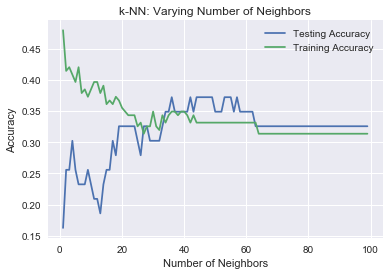

In [159]:
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


It looks like around 23 is the best we can get so far, let's try that out:

In [165]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)

print("Current Model Accuracy:")
print(knn.score(X_test, y_test))


Current Model Accuracy:
0.325581395349


It's an improvement, but not as accurately as I'd like it to be.

I'm going to plot a regression line to see how it looks: